<center> <span style="color:#0F3460;font-size:30px; font-weight: bold; padding:250px ;">Elevator Predictive Maintenance</span> </center>

<span> <center>Datasets:https://www.kaggle.com/datasets/shivamb/elevator-predictive-maintenance-dataset </center></span>

<center><span style="color:#0F3460;font-size:21px; font-weight: bold;">


<span style="color:#0F3460;font-size:21px; font-weight: bold;">1.1 Importing libaries </span>

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

<hr>

  <center><span style="color:#0F3460;font-size:30px; font-weight: bold;">Part 1</span> </center> <br>
  
  <center><span style="color:#0F3460;font-size:23px; font-weight: bold;">Data Preprocessing</span>  </center>

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.2 Importing My Data From *csv* File</span>

In [ ]:
epm = pd.read_csv("predictive-maintenance-dataset.csv")

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.3 Top 5 Rows</span>

In [ ]:
epm.head()

- ID: Used for tracking and managing records.
- Revolutions: Key feature for assessing wear and predicting when maintenance is needed based on usage.
- Humidity: Helps in understanding environmental factors affecting machinery performance.
- Vibration: Critical for early detection of mechanical issues, allowing for preventive actions.
- x1 to x5: Enhance the model by providing additional context and potentially capturing complex interactions affecting machinery health.



 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.4 Info</span>

In [104]:
epm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112001 entries, 0 to 112000
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           112001 non-null  int64  
 1   revolutions  112001 non-null  float64
 2   humidity     112001 non-null  float64
 3   vibration    109563 non-null  float64
 4   x1           112001 non-null  float64
 5   x2           112001 non-null  float64
 6   x3           112001 non-null  float64
 7   x4           112001 non-null  float64
 8   x5           112001 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 7.7 MB


 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.5 Cleaning</span>

In [103]:
epm_clean = epm.isnull().sum()
epm_clean

id                0
revolutions       0
humidity          0
vibration      2438
x1                0
x2                0
x3                0
x4                0
x5                0
dtype: int64

In [108]:
epm_clean = epm.dropna()
epm_clean.isnull().sum()

id             0
revolutions    0
humidity       0
vibration      0
x1             0
x2             0
x3             0
x4             0
x5             0
dtype: int64

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.6 Statistical Summary </span>


In [106]:
epm_clean.describe()

count       9.000000
mean      270.888889
std       812.666667
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2438.000000
dtype: float64

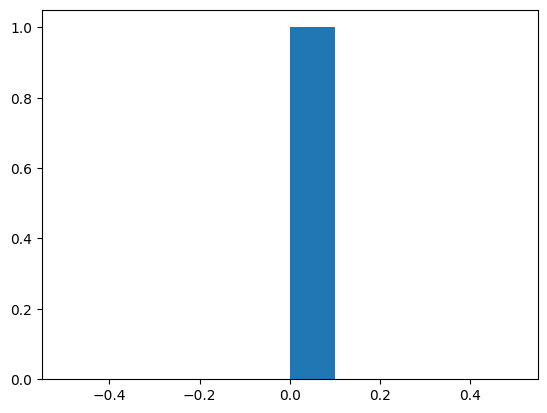

In [107]:
revolutions = epm_clean['revolutions']
plt.hist(revolutions)
plt.show()

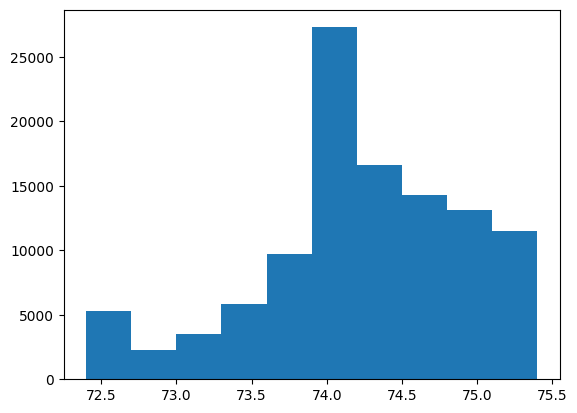

In [109]:
humidity = epm_clean['humidity']
plt.hist(humidity)
plt.show()

In [ ]:
vibration = epm_clean['vibration']
plt.hist(vibration)
plt.show()

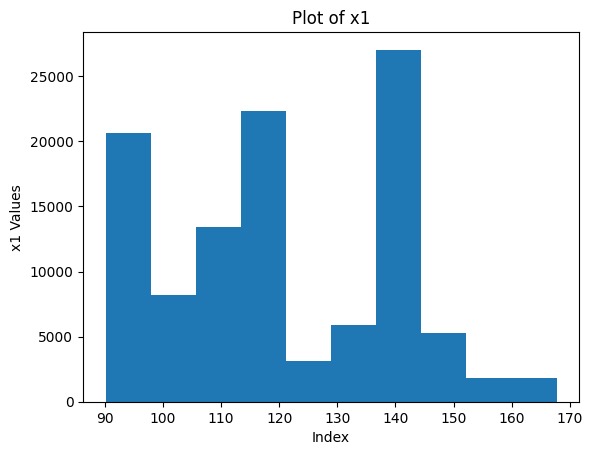

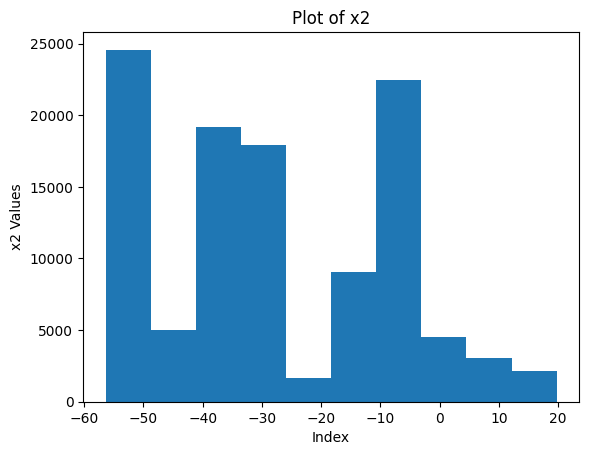

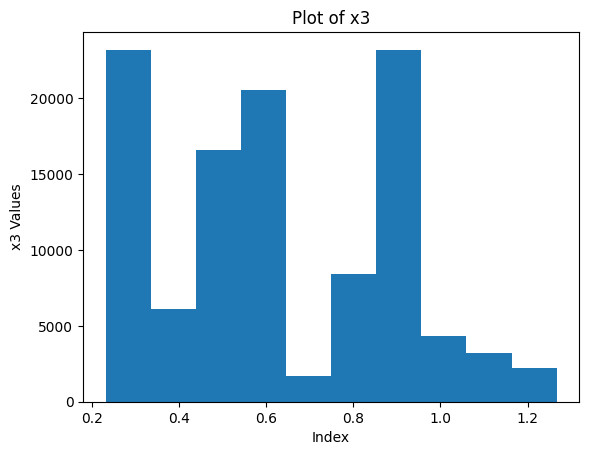

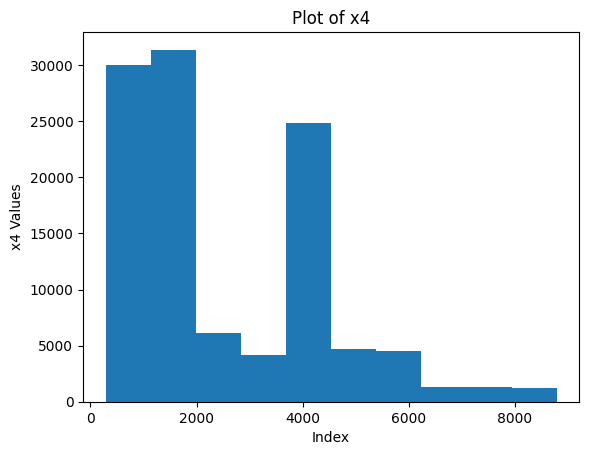

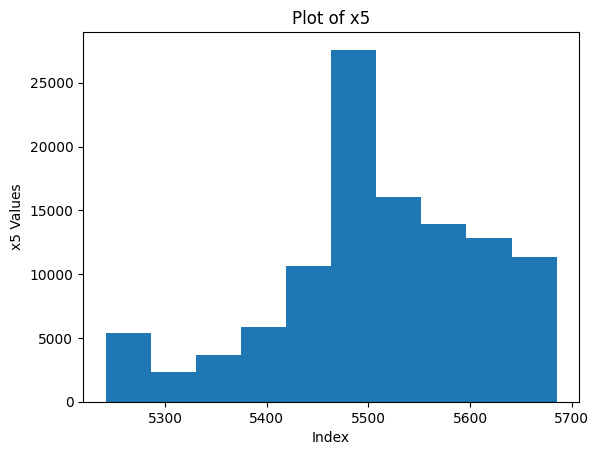

In [110]:
# Extract and plot x1 through x5
for i in range(1, 6):
	plt.figure()  # Create a new figure for each plot
	plt.hist(epm_clean[f'x{i}'])
	plt.title(f'Plot of x{i}')
	plt.xlabel('Index')
	plt.ylabel(f'x{i} Values')
	plt.show()

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.7 Relationships between Features</span>


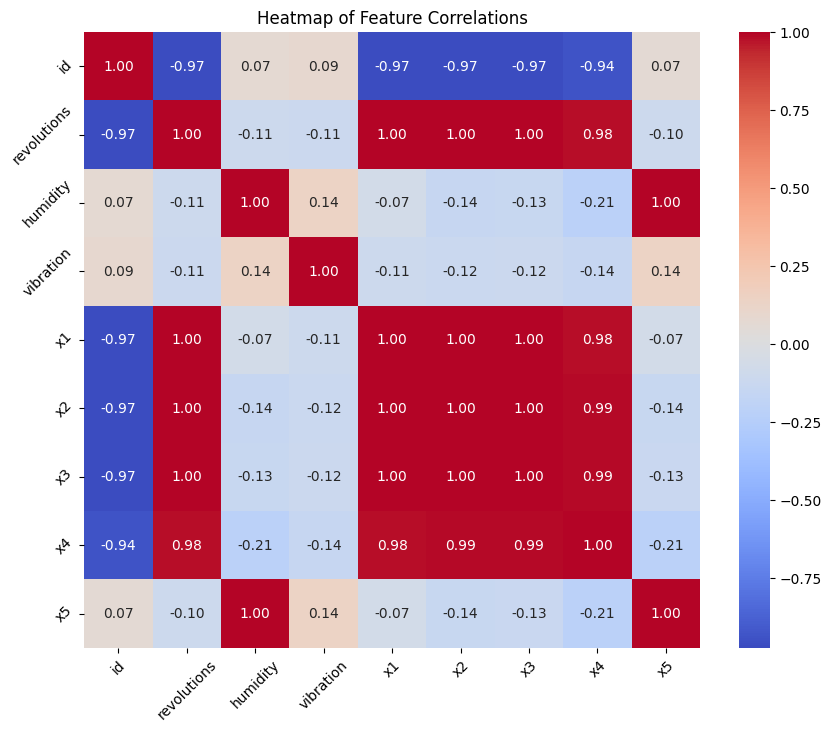

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# emp = pd.read_csv('path_to_your_dataset.csv')

# Calculate the correlation matrix
corr = epm_clean.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjusts the size of the plot
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Customizing the plot
plt.title('Heatmap of Feature Correlations')
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.yticks(rotation=45)  # Rotates the y-axis labels for better readability

# Display the plot
plt.show()

X5 and humidity 
X4, x3, x2, x1 and revolution 

Non of the sensors work good with vibration

In [125]:
import pandas as pd

# Read the training data
train_df = pd.read_csv('predictive-maintenance-dataset.csv', sep=" ", header=None)

# Print the shape and first few rows
print('Shape of Train dataset: ', train_df.shape)
print(train_df.head())


Shape of Train dataset:  (112002, 1)
                                                   0
0   ID,revolutions,humidity,vibration,x1,x2,x3,x4,x5
1  1,93.744,73.999,18,167.743,19.745,1.26682793,8...
2  2,93.74,73.999,18,167.739,19.741,1.266773875,8...
3  3,93.736,73.998,18,167.734,19.738,1.266736939,...
4  4,93.732,73.998,18,167.73,19.734,1.266682883,8...


In [126]:
print(train_df.columns)  # Print column indices

Index([0], dtype='int64')


In [121]:
# read training data and defining columns
train_df = pd.read_csv('predictive-maintenance-dataset.csv', sep=" ", header=None)
train_df.drop(train_df.columns[[26, 27]], axis=1, inplace=True)
col_names= ['id', 'revolutions', 'humidity', 'vibration', 'x1', 'x2', 'x3', 'x4', 'x5']
train_df.columns = col_names
print('Shape of Train dataset: ',train_df.shape)
train_df.head()


IndexError: index 26 is out of bounds for axis 0 with size 1

In [122]:
# Read the test data
test_df = pd.read_csv("predictive-maintenance-dataset.csv")

# Inspect the test DataFrame
print(test_df.shape) 
print(test_df.head()) 
print(test_df.columns)  


(112001, 9)
   ID  revolutions  humidity  vibration       x1      x2        x3  \
0   1       93.744    73.999       18.0  167.743  19.745  1.266828   
1   2       93.740    73.999       18.0  167.739  19.741  1.266774   
2   3       93.736    73.998       18.0  167.734  19.738  1.266737   
3   4       93.732    73.998       18.0  167.730  19.734  1.266683   
4   5       93.729    73.998       18.0  167.727  19.731  1.266642   

            x4           x5  
0  8787.937536  5475.852001  
1  8787.187600  5475.852001  
2  8786.437696  5475.704004  
3  8785.687824  5475.704004  
4  8785.125441  5475.704004  
Index(['ID', 'revolutions', 'humidity', 'vibration', 'x1', 'x2', 'x3', 'x4',
       'x5'],
      dtype='object')


In [123]:
# read ground truth data
truth_df = pd.read_csv('predictive-maintenance-dataset.csv', sep=" ", header=None)
truth_df.drop(truth_df.columns[[1]], axis=1, inplace=True)
truth_df.head()

IndexError: index 1 is out of bounds for axis 0 with size 1

In [124]:
# sort based on id and cycle
train_df = train_df.sort_values(['id', 'revolutions'])
train_df.head()

KeyError: 'id'

<span style="color:#0F3460;font-size:19px; font-weight: bold;">Data Preprocessing </span>

In [ ]:
# Data Labeling - generate column RUL
rul = pd.DataFrame(train_df.groupby('id')['revolutions'].max()).reset_index()
rul.columns = ['id', 'max']
train_df = train_df.merge(rul, on=['id'], how='left')
train_df['RUL'] = train_df['max'] - train_df['revolutions']
train_df.drop('max', axis=1, inplace=True)
train_df.head()

In [ ]:
# generate label columns for training data
w1 = 50
w0 = 25
train_df['label1'] = np.where(train_df['RUL'] <= w1, 1, 0 )
train_df['label2'] = train_df['label1']
train_df.loc[train_df['RUL'] <= w0, 'label2'] = 2
train_df.head()

In [ ]:
# generate label columns for training data
w1 = 50
w0 = 25
train_df['label1'] = np.where(train_df['RUL'] <= w1, 1, 0 )
train_df['label2'] = train_df['label1']
train_df.loc[train_df['RUL'] <= w0, 'label2'] = 2
train_df.head()

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.8 Visualizing Relationships</span>

- revolutions vs x1

In [ ]:
# Prepare data for revolutions vs. x1 plot
revolutions = epm_clean['revolutions']
x1 = epm_clean['x1']
time_revolutions = np.arange(len(revolutions))

humidity = epm_clean['humidity']
x5 = epm_clean['x5']
time_humidity = np.arange(len(humidity))

# Create a figure and axis for revolutions vs. x1 plot
plt.figure(figsize=(15, 4))
plt.plot(time_revolutions, revolutions, label='Revolutions')
plt.plot(time_revolutions, x1, label='x1')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Line Plot for Revolutions and x1 over Time')
plt.legend()
plt.show()


- Humidity vs x5

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(time_humidity, humidity, label='Humidity')
plt.plot(time_humidity, x5, label='x5')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Line Plot for Humidity and x5 over Time (Matplotlib)')
plt.legend()
plt.show()

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.8 Function to reshape dataset as required by LSTM</span>

In [ ]:
def gen_sequence(epm_clean, seq_length, seq_cols):

    # Ensure only feature columns are used
    data_array = epm_clean[seq_cols].values
    num_elements = data_array.shape[0]

    for start, stop in zip(range(0, num_elements - seq_length + 1), range(seq_length, num_elements + 1)):
          yield data_array[start:stop, :]


In [ ]:
# Define sequence length and columns to use
sequence_length = 3
feature_columns = ['revolutions', 'humidity', 'vibration', 'x1', 'x2', 'x3', 'x4', 'x5']


In [ ]:
# Generator for the sequences
seq_gen = (list(gen_sequence(epm_clean[epm_clean['vibration'] == id], sequence_length, feature_columns))
           for id in epm_clean['vibration'].unique())

In [ ]:
# Convert generator to list, filtering out empty sequences
seq_list = [seq for seq_batch in seq_gen for seq in seq_batch if seq_batch]
seq_array = np.concatenate(seq_list).astype(np.float32)

# Print the shape of the resulting numpy array
print(seq_array.shape)

In [ ]:
def gen_labels(id_df, seq_length, label):
    data_array = id_df[label].values
    num_elements = data_array.shape[0]
    return data_array[seq_length:num_elements, :]

In [ ]:
label_gen = [gen_labels(epm_clean[epm_clean['vibration']==id], sequence_length, ['humidity'])
             for id in epm_clean['vibration'].unique()]
label_array = np.concatenate(label_gen).astype(np.float32)
print(label_array.shape)

In [ ]:
%pip install keras

In [ ]:
%pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Example dummy data for seq_array and label_array
# Replace these with your actual data
import numpy as np

seq_array = np.random.rand(100, 10, 5)  # 100 samples, 10 timesteps, 5 features
label_array = np.random.randint(2, size=(100, 1))  # 100 samples, 1 output label

model = Sequential()  # Define the model

# Feature weights
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]

# First LSTM layer
model.add(LSTM(
    units=256,
    input_shape=(seq_array.shape[1], nb_features),  # Set input shape for the first layer
    return_sequences=True  # Set to True because we have a second LSTM layer
))
# Plus a 30% dropout rate
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(
    units=128,  # Adjust the number of units as needed
    return_sequences=True
))
model.add(Dropout(0.2))

# Third LSTM layer
model.add(LSTM(
    units=64,
    return_sequences=False
))
model.add(Dropout(0.2))

# Dense sigmoid layer
model.add(Dense(units=nb_out, activation='sigmoid'))

# With adam optimizer and a binary crossentropy loss. We will optimize for model accuracy.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Verify the architecture
print(model.summary())

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
#EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,         
    patience=20,    
    verbose=0,   
    mode='auto'    
)

<hr>

In [ ]:
# Train the model
history=model.fit(
    seq_array, 
    label_array,
    epochs=200,        
    batch_size=150,
    validation_split=0.2,  
    verbose=1,          # Verbosity mode
    callbacks=[early_stopping]  # Add early stopping callback
)

<span style="color:#0F3460;font-size:19px; font-weight: bold;">Results</span>

In [ ]:
fig_acc = plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
fig_acc = plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve, precision_score, recall_score

def print_results(y_test, y_pred):
    # F1 Score
    f1 = f1_score(y_test, y_pred)
    print("F1 Score: ", f1)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 6))
    
    plt.subplot(121)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    
    # ROC AUC Score
    model_roc_auc = roc_auc_score(y_test, y_pred)
    print("Area under curve: ", model_roc_auc, "\n")
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    gmeans = np.sqrt(tpr * (1 - fpr))
    ix = np.argmax(gmeans)
    best_threshold = np.round(thresholds[ix], 3)
    
    plt.subplot(122)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC: %.3f' % model_roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best Threshold: ' + str(best_threshold))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    
    plt.tight_layout()
    plt.show()

In [ ]:
# training metrics
scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=200)
print('Accurracy of model on training data: {}'.format(scores[1]))

In [ ]:
# make predictions and compute confusion matrix
y_pred_prob = model.predict(seq_array, verbose=1, batch_size=200)

# Convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Flatten the predictions to match the shape of y_test
y_pred = y_pred.flatten()

# Assuming y_true is the true labels
y_true = label_array.flatten()

In [ ]:
# Compute and print precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print('Precision: ', precision)
print('Recall: ', recall)

In [ ]:
# Print results
print_results(y_true, y_pred)